# Week 1: Percolation theory

Welcome to CPP! This is the jupyter notebook for the tasks of the first week. In this notebook, we will:
1) Initialise a system
2) Identify the clusters in the system
3) Analyse various properties such as average size, probability of percolating, etc.

I have added descriptions, links and hints; this assignment has been made such that google, stackexchange, and python documentation should be more than enough to do this easily. While I cannot control what you do, I encourage you to not go to LLMs to do these tasks. They are easy enough and are instructive and will help you learn more python, which vibecoding will not.

I will also encourage you to comment your code if you get time; it will help when you look back at the code when you are making your report.

Feel free to ask doubts in the group or in my DMs!

## 1. Initialising the system

In the cell below, write a function which takes in two values: $n$, which is the length of the square grid we are making, and $p$ which is the probability that a square is filled (or black), and returns a 2D array which will be our grid.

Hint: np.random.rand

In [4]:
import numpy as np
import matplotlib.pyplot as plt # importing for later cells

def initialise_system(n, p):
  choices = [True, False] # two possible ways, filled or not filled
  pbts = [p, 1-p] # probability of each choice
  return np.random.choice(choices, size=(n, n), p=pbts)

## 2. Identifying and Labelling clusters: Hoshen Kopelman algorithm

From the previous section you now have a 2D numpy array which is a grid with "True" and "False" values. Your task now is to write a function that scans the grid and assigns a unique integer label to each connected cluster of occupied sites.

A cluster is defined as a group of occupied sites that are connected to each other through nearest neighbours (up, down, left, right).

Define a function, which takes in the 2D array as input, and returns a new array labels of the same shape, where:

1) labels[i, j] = 0 if the site is empty
2) labels[i, j] = k if the site belongs to cluster k

Clusters that are connected (via nearest neighbours) must have the same label. This is the hardest part of the assignment. Not to worry, I have given a detailed outline of the algorithm below. Try to google, stackexchange and use python documentation before moving to some LLM; this is a good time to learn python, and vibe coding is not the same as learning.

You can learn more about this algorithm in the following link: https://en.wikipedia.org/wiki/Hoshen%E2%80%93Kopelman_algorithm


In [6]:
def label_clusters(grid):

  def find(x):
    x = int(x)
    y = x

    while labels[y] != y: # main root finder code
      y = labels[y]

    while labels[x] != x: # path optimisation code
      z = labels[x]
      labels[x] = y
      x = z

    return y

  def union(x, y):
    x = int(x)
    y = int(y)
    labels[find(x)] = find(y) # taking union by setting common root

  n = len(grid) # extracting length of square grid
  largest_label = 0
  label_grid = np.zeros((n, n), dtype=int) # initial grid of labels, to be modified with cluster labels
  labels = np.array([k for k in range(0, n*n)]) # array with integers from 0 to size of grid

  # FIRST PASS
  for i in range(n): # iterate over rows
    for j in range(n): # iterate over columns

      if grid[i, j]: # only label filled values

        if j-1 >= 0: # checking for left boundary
          left = grid[i, j-1]
        else:
          left = False
        if i-1 >= 0: # checking for top boundary
          above = grid[i-1, j]
        else:
          above = False

        if not left and not above: # no lebel on left and above
          largest_label += 1 # new label assigned
          label_grid[i, j] = largest_label
        elif left and not above:
          label_grid[i, j] = find(label_grid[i, j-1])
        elif not left and above:
          label_grid[i, j] = find(label_grid[i-1, j])
        else:
          union(label_grid[i, j-1], label_grid[i-1, j]) # take union
          label_grid[i, j] = find(label_grid[i, j-1])

  # SECOND PASS for final fixes
  for i in range(n): # iterate over rows
    for j in range(n): # iterate over columns
      if grid[i, j]:
        label_grid[i, j] = find(label_grid[i, j]) # set all filled squares to their root value

  return label_grid

## 3. Check if the system percolated

Check if the system has percolated or not by checking if there is a cluster label appearing on opposite edges of the system. No hints for this one!

In [7]:
def percolates(grid):
  clustered_grid = label_clusters(grid)
  n = len(grid)
  for i in range(n):
    for j in range(n):
      if clustered_grid[0, i] != 0 and clustered_grid[0, i] == clustered_grid[n-1, j]:
        return clustered_grid[0, i] # return the percolating cluster label
  return 0

def percolates_clustered(clustered_grid):
  n = len(clustered_grid)
  for i in range(n):
    for j in range(n):
      if clustered_grid[0, i] != 0 and clustered_grid[0, i] == clustered_grid[n-1, j]:
        return clustered_grid[0, i] # return the percolating cluster label
  return 0

## 4. Visualise your grid!

Visualisation is very important; it is very useful while debugging, also gives physical insights. Hint: use matplotlib's matshow to plot your grid along with the label of the cluster. You can also colour code the labels too! Check out the various colourmaps matplotlib has to offer.

True


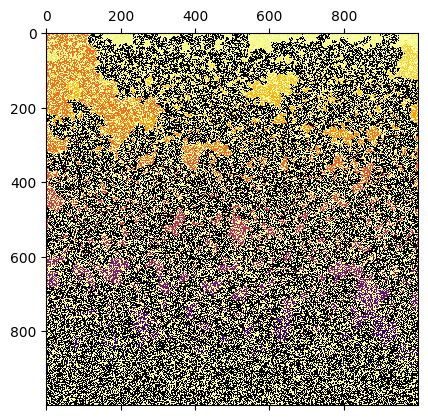

In [23]:
n = 1000
p = 0.6
grid = initialise_system(n, p)
print(bool(percolates(grid))) # just to check percolation

def plot_grid(grid):
  plt.matshow(label_clusters(grid), cmap='inferno_r')
  plt.show()

plot_grid(grid)

### Analysis time!

That's all the prep needed! Now for squares of length 8,16 and 32, find the following as a function of $p$

1) Find the weighted average of the cluster size. If the system is percolating, do not count the percolating cluster.
2) Find percolation strength (this is the size of the percolating system divided by the size of the system. If system does not percolate, this value is 0)
3) Find the percolation rate (find the probability that the system will percolate)

Initialise $N$ number of systems and average over them to get probability. Plot these three using matplotlib. Based on these plots, give comments regarding your observations. If you see a phase transition, can you estimate its critical probability?
   
You can learn more about percolation and these terms from the following reference:
1) https://www.mit.edu/~levitov/8.334/notes/percol_notes.pdf

The reference is advanced, so don't worry if you cannot understand it fully.

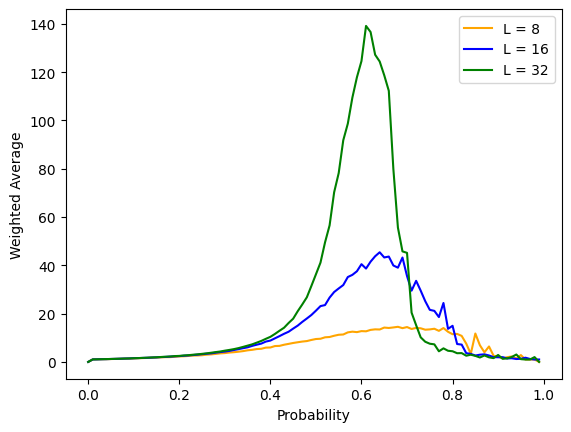

In [18]:
# weighted average of cluster size VS probability

def weighted_average(n, p, N=1000):

  A = 0 # numerator, double summation of (cluster size)^2
  B = 0 + 1e-20 # denominator, double summation of (cluster size) ---- a small value above 0 to avoid division by 0

  for i in range(N):
    grid = initialise_system(n, p)
    clustered_grid = label_clusters(grid)

    nonzero_grid = clustered_grid[clustered_grid!=0] # remove non-filled values
    cluster_labels, sizes = np.unique(nonzero_grid, return_counts=True) # get cluster sizes

    percolated = percolates_clustered(clustered_grid) # check if system percolates, optimised by not clustering each time
    if not percolated: # if system does not percolate
      for s in sizes:
        A += s**2
        B += s
    else: # if system percolates
      percolating_label = percolated # label of percolating cluster
      sizes = sizes[cluster_labels!=percolating_label] # remove the percolating cluster
      for s in sizes:
        A += s**2
        B += s

  return A/B # weighted average

pbts = np.arange(0, 1, 0.01)
S_8 = [weighted_average(8, p, 1000) for p in pbts]
S_16 = [weighted_average(16, p, 1000) for p in pbts]
S_32 = [weighted_average(32, p, 1000) for p in pbts]

plt.plot(pbts, S_8, label="L = 8", color='orange')
plt.plot(pbts, S_16, label="L = 16", color='b')
plt.plot(pbts, S_32, label="L = 32", color='g')
plt.xlabel("Probability")
plt.ylabel("Weighted Average")
plt.legend()
plt.show()


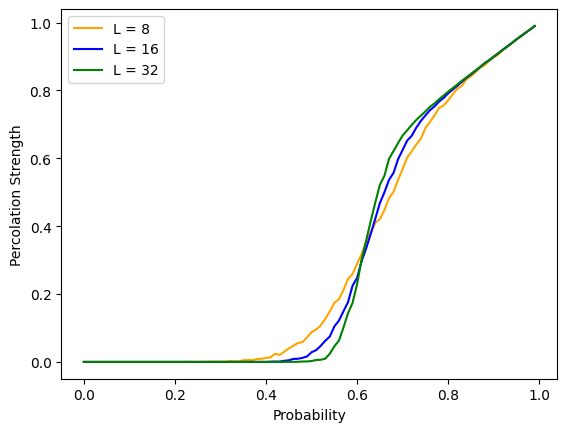

In [19]:
# percolation strength VS probability

def percolation_strength(n, p, N=1000):

  total = 0

  for i in range(N):
    grid = initialise_system(n, p)
    clustered_grid = label_clusters(grid)
    percolating_label = percolates_clustered(clustered_grid)

    if percolating_label: # if system percolates
      total += np.sum(clustered_grid == percolating_label) # add number of sites in percolating cluster

  return total/((n**2)*N) # average of percolation strengths of grids

pbts = np.arange(0, 1, 0.01)
PS_8 = [percolation_strength(8, p, 1000) for p in pbts]
PS_16 = [percolation_strength(16, p, 1000) for p in pbts]
PS_32 = [percolation_strength(32, p, 1000) for p in pbts]

plt.plot(pbts, PS_8, label="L = 8", color='orange')
plt.plot(pbts, PS_16, label="L = 16", color='b')
plt.plot(pbts, PS_32, label="L = 32", color='g')
plt.xlabel("Probability")
plt.ylabel("Percolation Strength")
plt.legend()
plt.show()

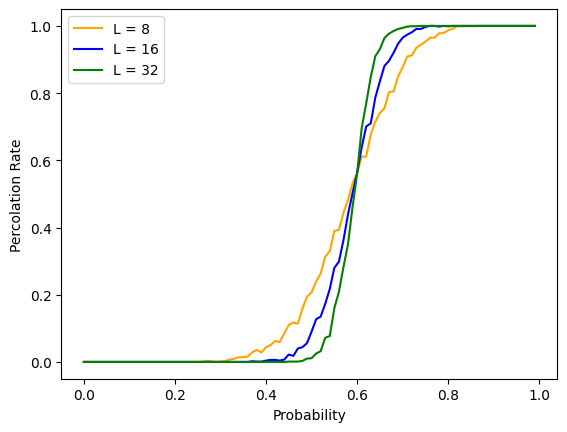

In [20]:
# percolation rate VS probability

def percolation_rate(n, p, N=1000):

  percolated_grids = 0

  for i in range(N):
    grid = initialise_system(n, p)
    clustered_grid = label_clusters(grid)
    percolated = percolates_clustered(clustered_grid)

    if percolated: # if system percolates
      percolated_grids += 1

  return percolated_grids/N # percolation rate

pbts = np.arange(0, 1, 0.01)
PR_8 = [percolation_rate(8, p, 1000) for p in pbts]
PR_16 = [percolation_rate(16, p, 1000) for p in pbts]
PR_32 = [percolation_rate(32, p, 1000) for p in pbts]

plt.plot(pbts, PR_8, label="L = 8", color='orange')
plt.plot(pbts, PR_16, label="L = 16", color='b')
plt.plot(pbts, PR_32, label="L = 32", color='g')
plt.xlabel("Probability")
plt.ylabel("Percolation Rate")
plt.legend()
plt.show()

In [24]:
# estimating critical probability from plots

diff = np.array(PR_16) - np.array(PR_32) # list of differences between percolation rates

sign_change = np.where(np.diff(np.sign(diff)))[0]
crossings = pbts[sign_change] # list of pbts where curves cross, i.e., sign of difference changes

gaps = crossings[2:] - crossings[:-2] # list of gaps surrounding each point

idx = np.argmax(gaps) + 1 # picking the most isolated crossing (largest surrounding gap) of curves as pc
pc_est = crossings[idx]

print("Estimated Critical Probability:", pc_est)

Estimated Critical Probability: 0.6


## Bonus: Bethe lattice

Read about the Bethe lattice: https://en.wikipedia.org/wiki/Bethe_lattice

Can you find its critical probability? It's a very neat answer and does not require code.

## Bonus 2.0: Bond percolation

Find what bond percolation is and try out the above tasks for 2D lattice but with bonds instead of filled/unfilled sites. This is trickier though, so try this if you have time. Is the critical probability same or different?